In [168]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 200

In [169]:
# Connect Google Drive to colab and inspect the file
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/UpGrad DS Course/Course 2: ML 1/Lead Scoring Case Study/Leads.csv'
lead_data = pd.read_csv(path)
lead_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [170]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [171]:
# Get the shape of the dataframe
lead_data.shape

(9240, 37)

In [172]:
# DEscribing the dataframe
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [173]:
# Check the number of missing values in each column 
lead_data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [174]:
# Checking the missing values in percentage form. 
lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Step 1: Data Cleaning and Preparation and EDA

There are a lot of columns that have a large number of missing values. Clearly these columns are not useful. As there are more than 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use. 

In [175]:
cols = lead_data.columns
for col in cols:
  if lead_data[col].isnull().sum()>3000:
    lead_data = lead_data.drop(col,axis=1)

lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Select                                       No   
1  Select                                       No   
2  Mumbai                                       No   
3  Mumbai  

In [176]:
#Checking the new shape of the dataframe. 
lead_data.shape

(9240, 31)

In [177]:
# Checking the number of null values again.
lead_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [178]:
# Checking the missing values in percentage form again. 
lead_data.isnull().sum()/lead_data.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Let's check the value counts for the categorical columns to check for and then let's drop all columns that are of no use to the analysis due to data imbalance.

In [179]:
cols = lead_data.columns
for col in cols[2:]:
  print()
  print()
  print(col,":")
  print(lead_data[col].value_counts())




Lead Origin :
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source :
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


Do Not Email :
No     8506
Yes     734
Name: Do Not Email, dtype: int64


Do Not Call :
No     9238
Yes       2
Name: Do Not Call, dtype: int64


Converted :
0    5679
1    3561
Name: Converted, d

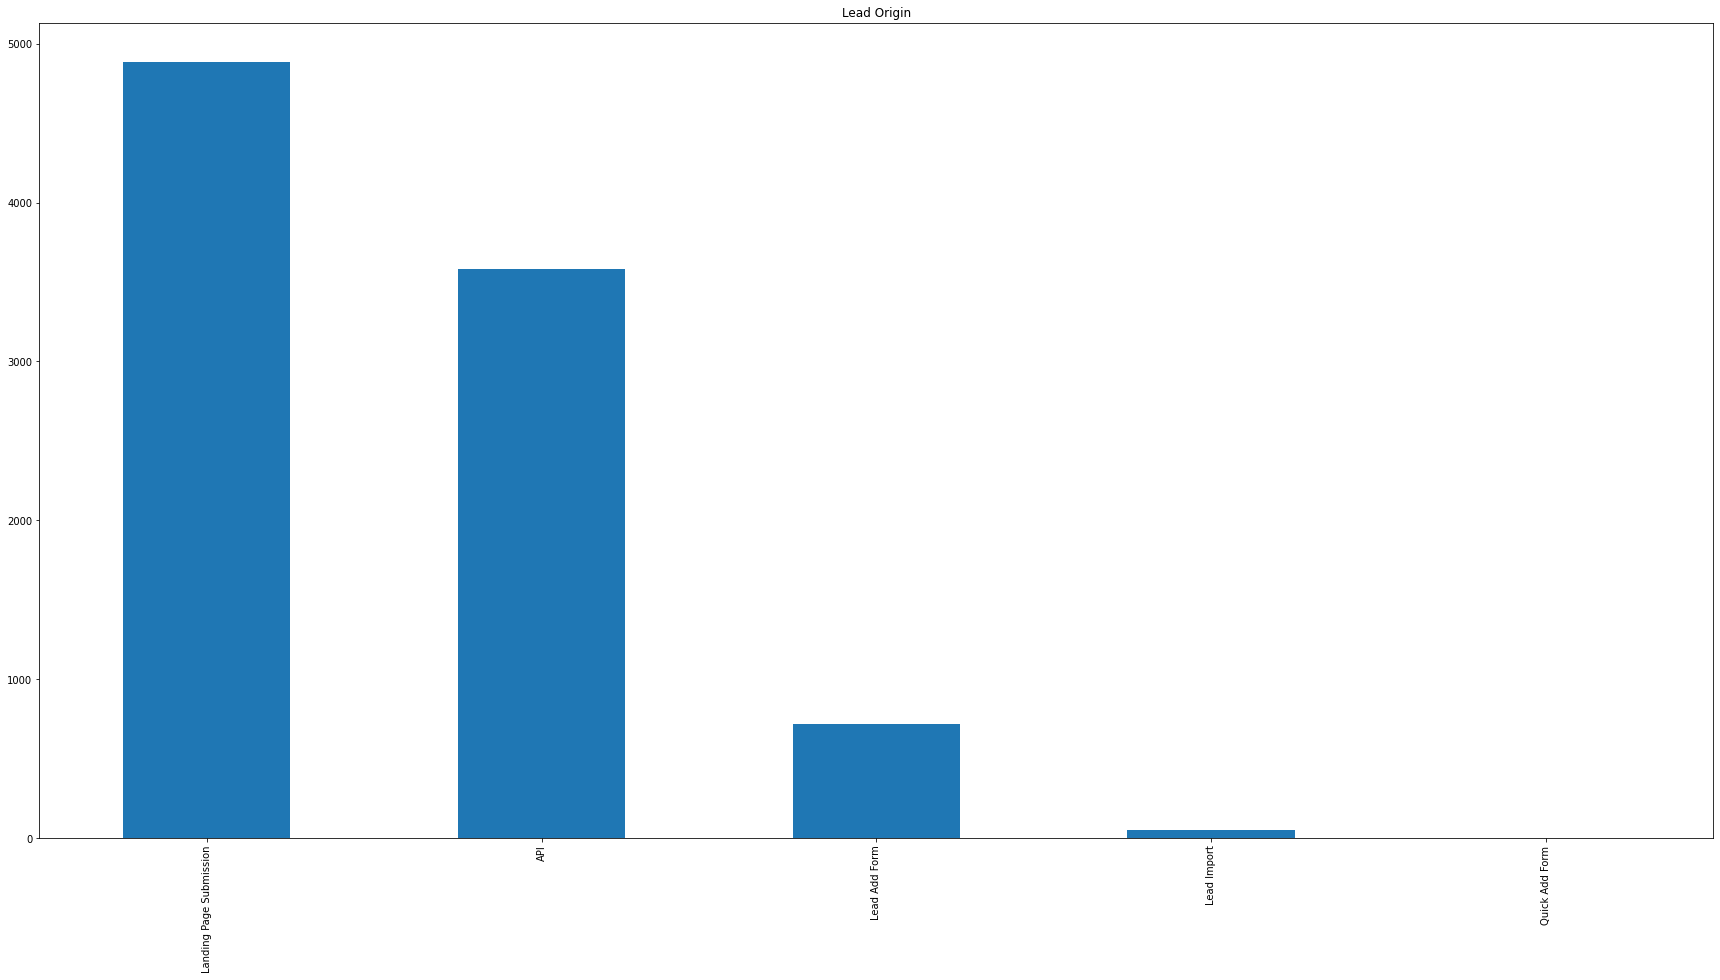

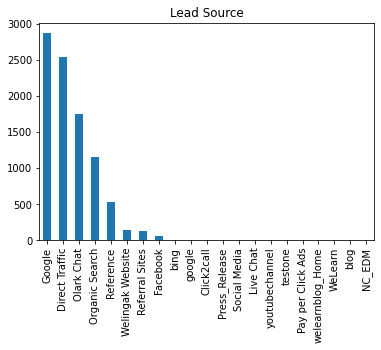

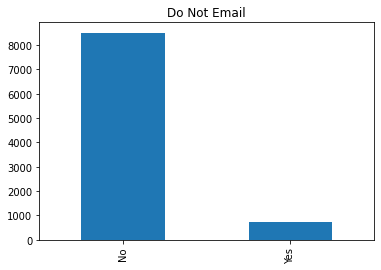

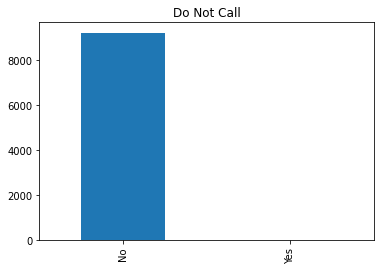

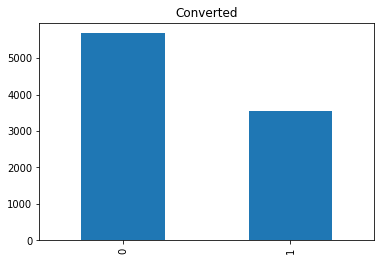

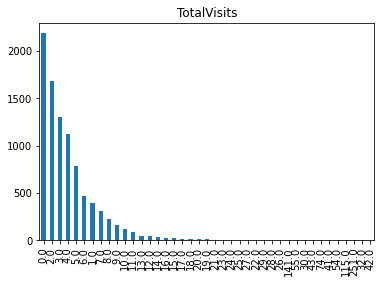

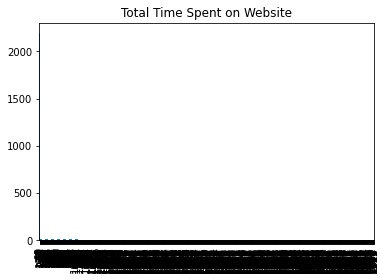

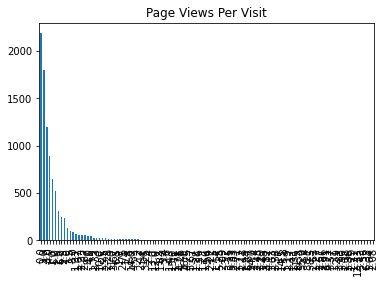

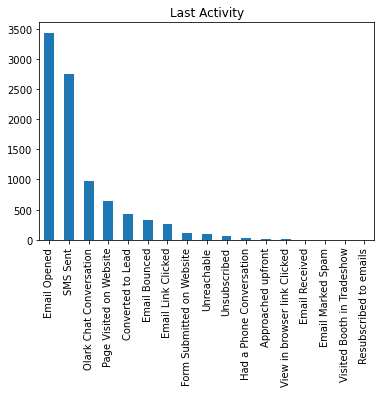

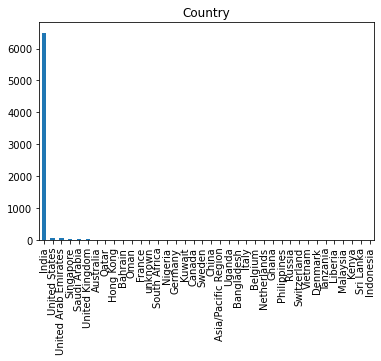

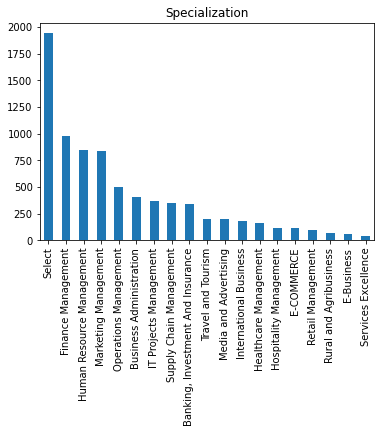

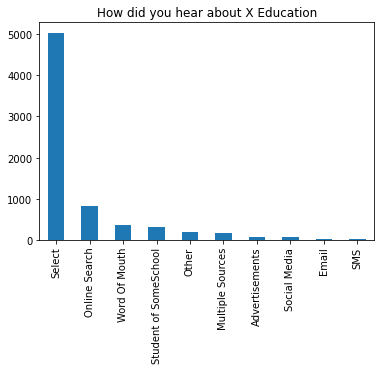

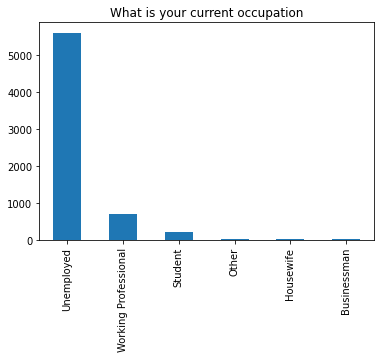

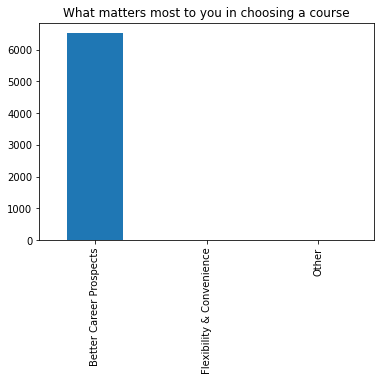

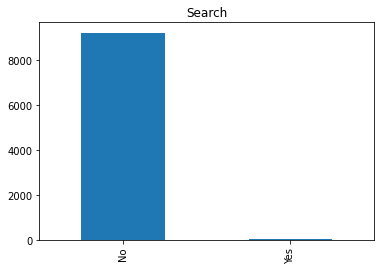

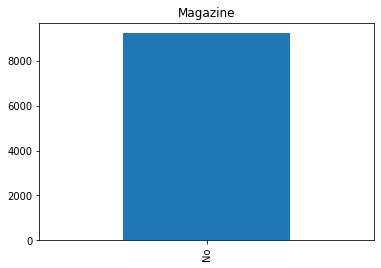

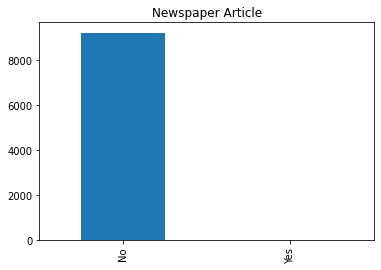

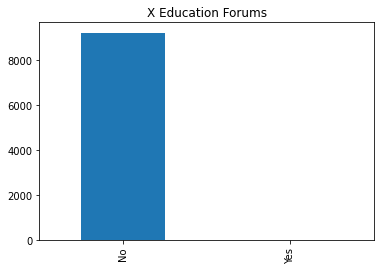

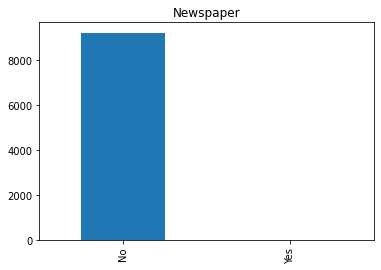

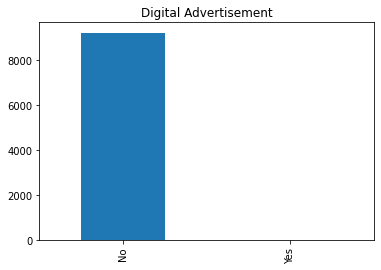

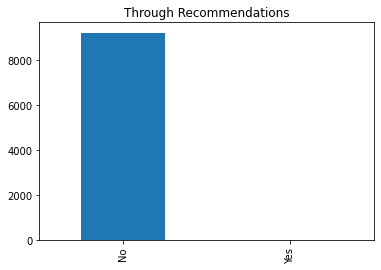

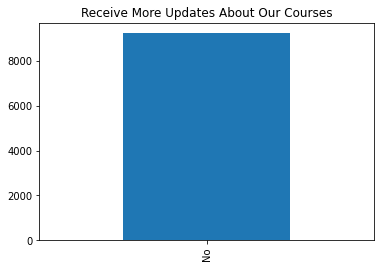

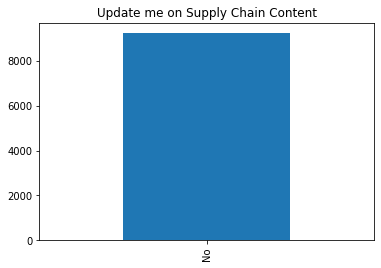

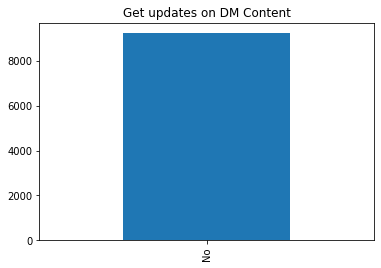

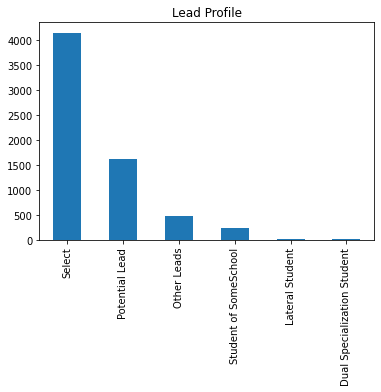

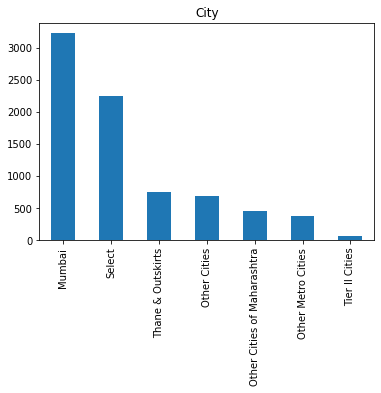

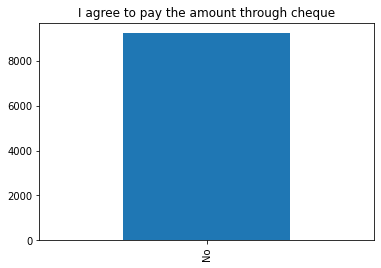

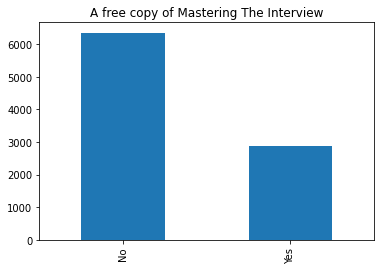

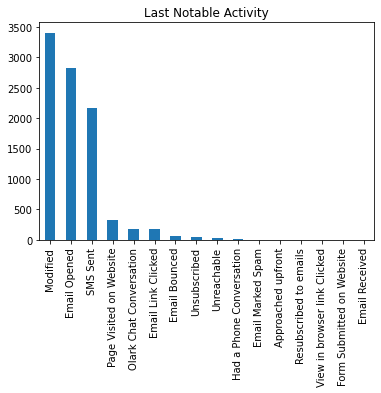

In [180]:
plt.figure(figsize=(30,15))
for i in range(2,len(cols)):
  #plt.subplot(4,8,i+1)
  lead_data[cols[i]].value_counts().plot(kind='bar',title=cols[i])
  plt.show()

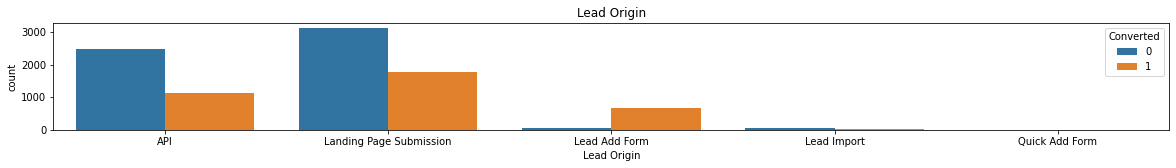

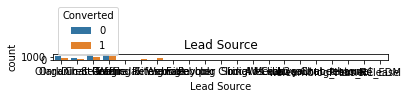

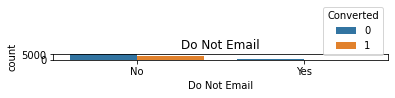

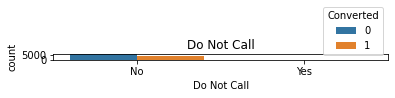

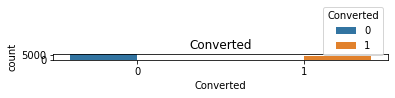

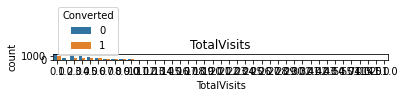

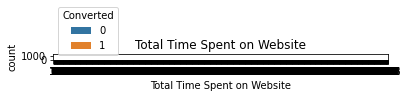

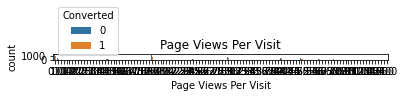

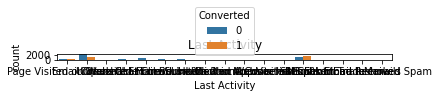

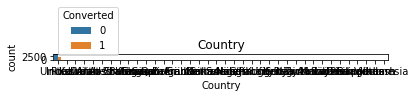

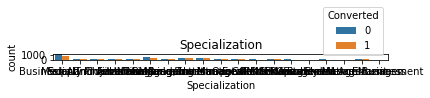

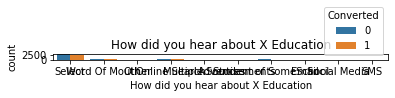

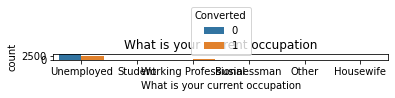

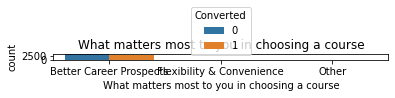

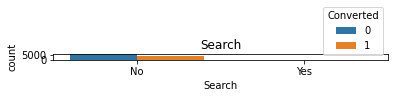

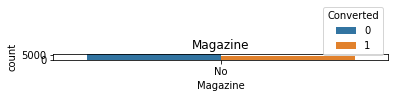

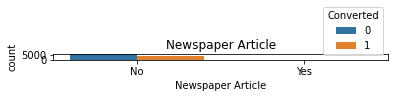

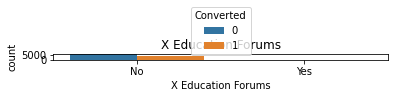

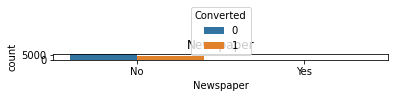

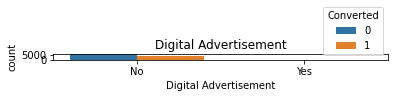

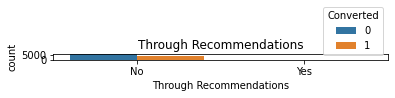

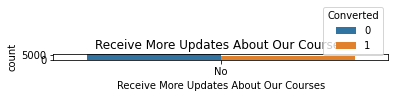

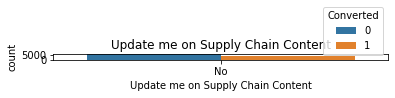

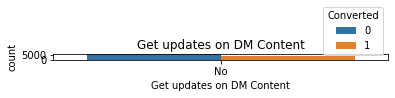

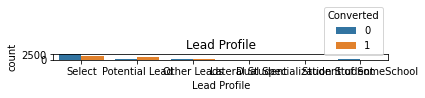

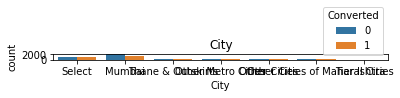

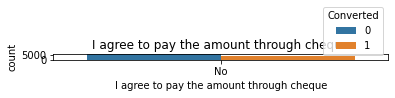

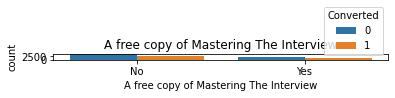

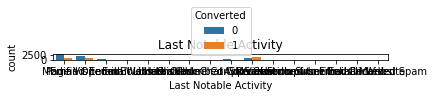

In [181]:
plt.figure(figsize=(20,75))
for i in range(2,len(cols)):
  plt.subplot(32,1,i)
  sns.countplot(data=lead_data,x=cols[i],hue="Converted").set(title=cols[i])
  plt.show()

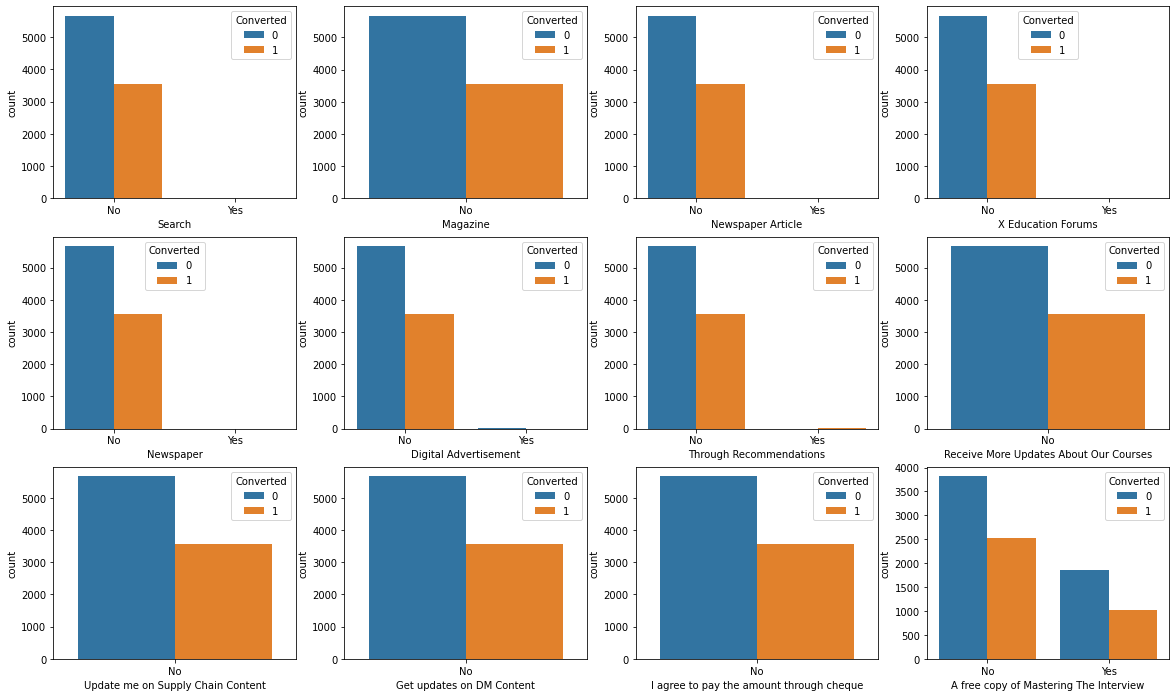

In [182]:
# Visualzing the variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead_data, ax = axs[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data, ax = axs[0,2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data, ax = axs[0,3])
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data, ax = axs[1,0])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data, ax = axs[1,1])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data, ax = axs[1,2])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data, ax = axs[1,3])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data, ax = axs[2,0])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data, ax = axs[2,1])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data, ax = axs[2,2])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data, ax = axs[2,3])
plt.show()

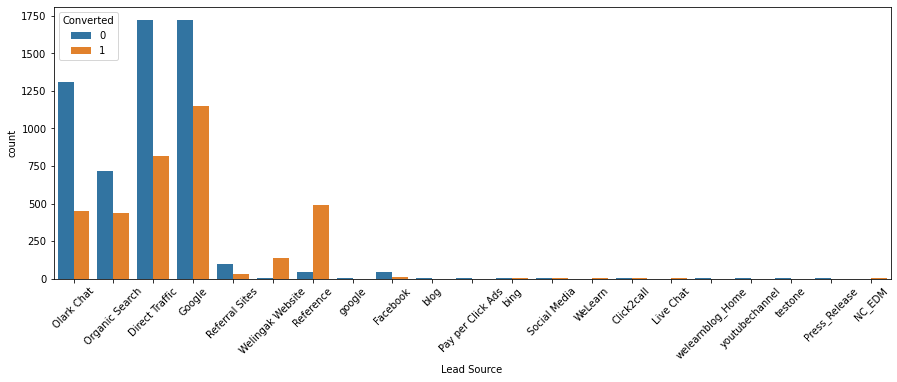

In [183]:
# Visualizing the count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

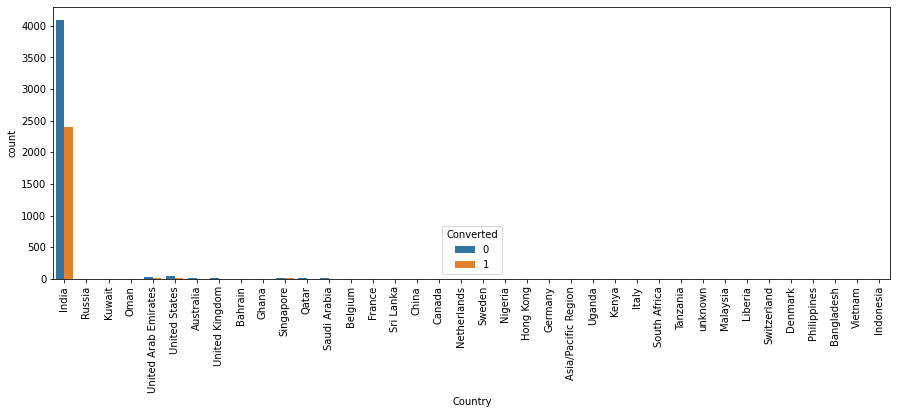

In [184]:
# Visualizing the Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =lead_data )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


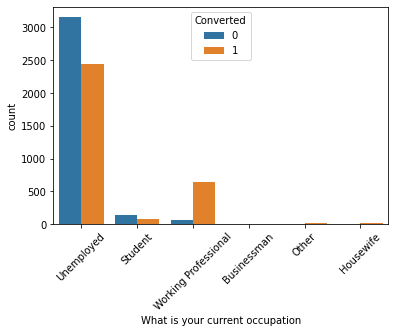

In [185]:
# Visualizing the Country variable after imputation
# Visualizing the count of variables based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

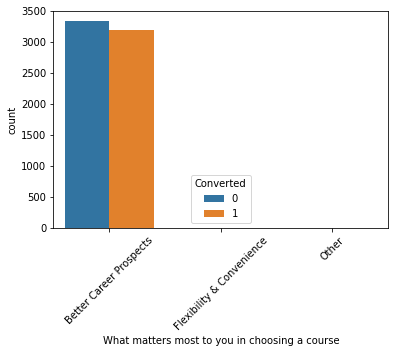

In [186]:
# Visualizing the count of variables based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

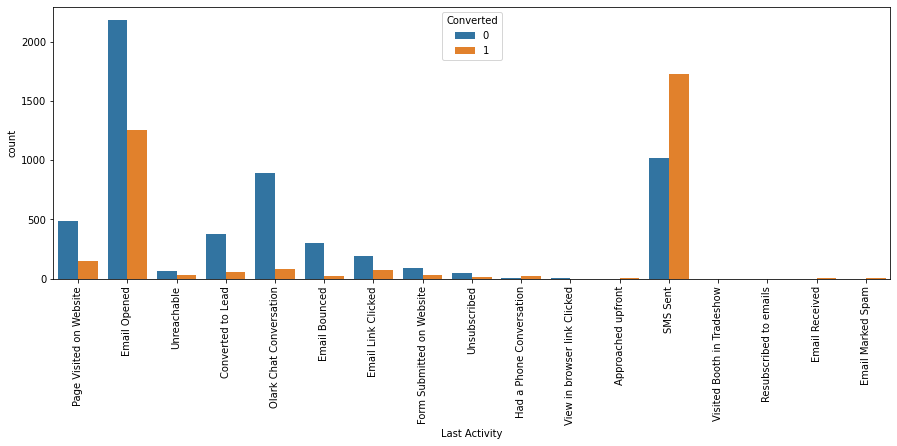

In [187]:
# Visualizing the count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

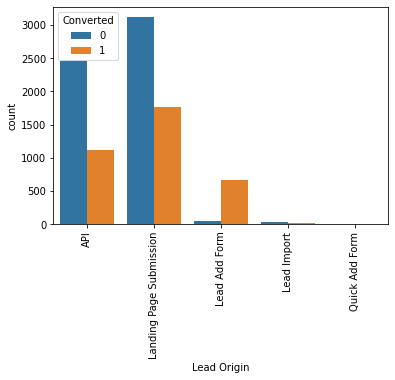

In [188]:
#Lead Origin

s1=sns.countplot(x='Lead Origin', hue='Converted' , data = lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

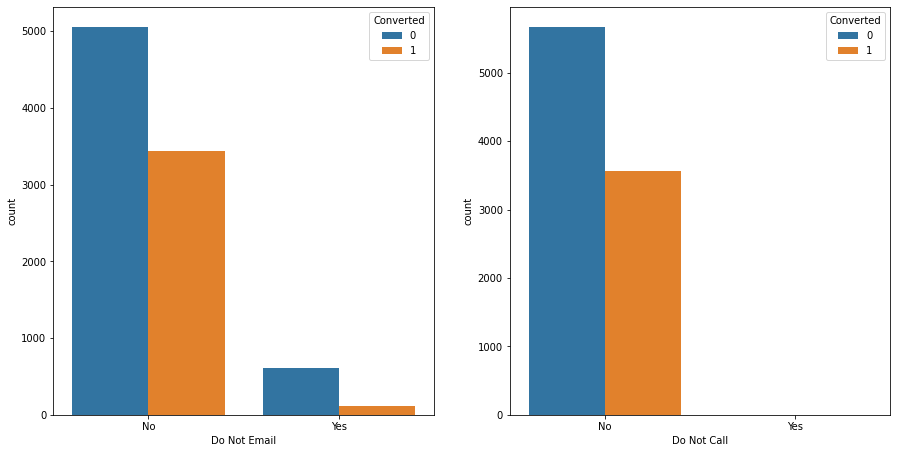

In [189]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1])
plt.show()


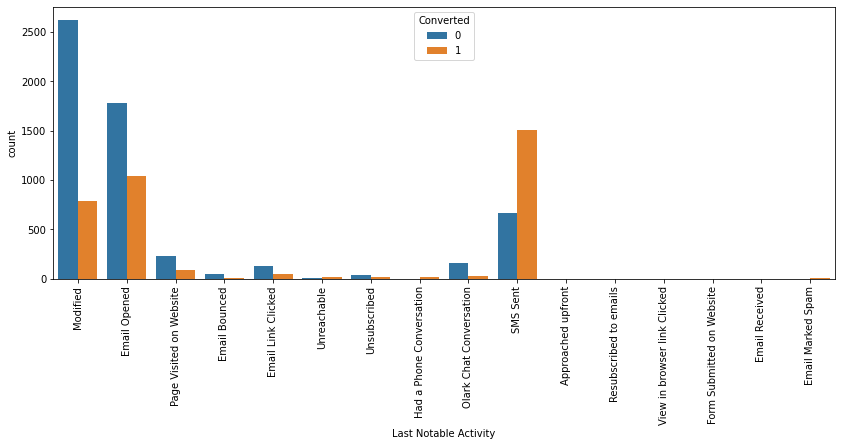

In [190]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

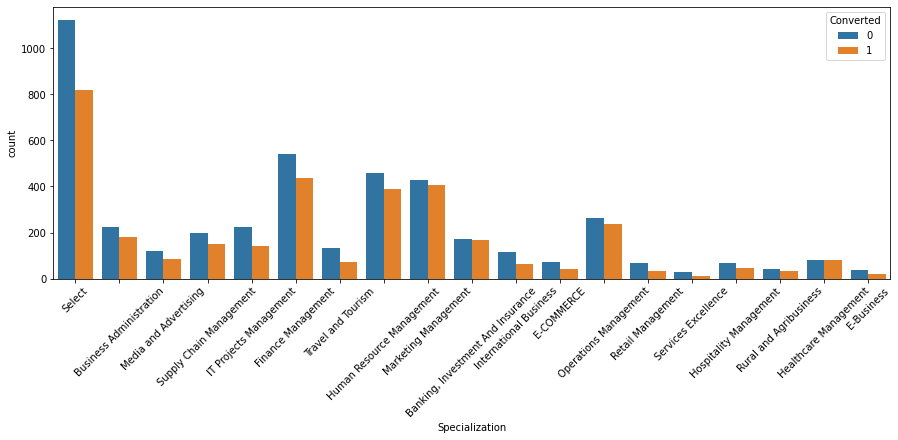

In [191]:
# Visualizing the count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Specialization', hue='Converted' , data =lead_data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Numerical Attribute Analysis

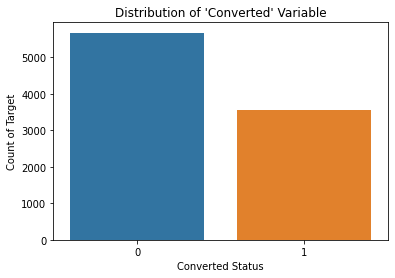

In [192]:
# Converted is the target variable. It indicates whether a lead has been successfully converted (1) or not (0).
# Visualizing the distribution of 'Converted' variable
sns.countplot(lead_data.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [193]:
# Checking the conversion rate
Converted = ((sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100)
Converted

38.53896103896104

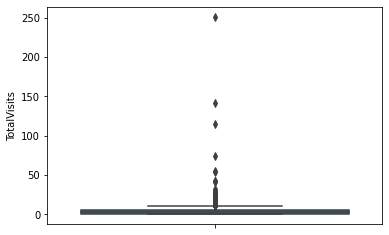

In [194]:
# Visualizing the spread of the variable Total Visits

sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

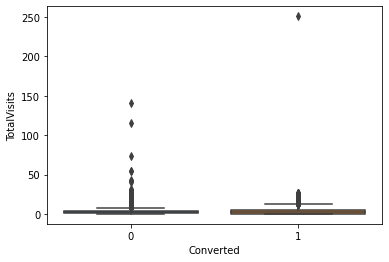

In [195]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

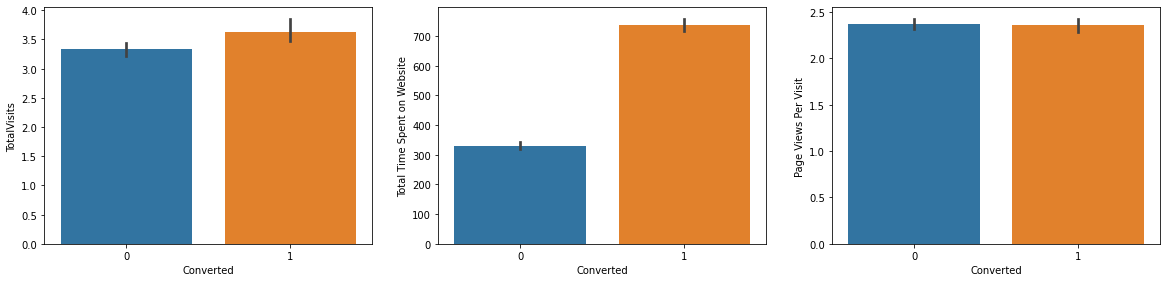

In [196]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = lead_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = lead_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted',  data = lead_data)
plt.show()

We will drop the following columns as they are of no use to this analysis.



1.   City: Not needed
2.   Country: Not needed




In [197]:
lead_data= lead_data.drop(columns=["City","Country"],axis=1)

In [198]:
#Let's check again for the count of missing values.
lead_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [199]:
#Let's check again for the count of missing values in percentage.
lead_data.isnull().sum().sort_values(ascending=False)/lead_data.shape[0]*100

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

As seen from the value counts above, "Select" is significantly present in 3 columns. Let's check these 3 columns once again. 

In [200]:
lead_data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [201]:
lead_data["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [202]:
lead_data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [203]:
lead_data = lead_data.drop("Lead Profile",axis=1)
lead_data = lead_data.drop("How did you hear about X Education",axis=1)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [204]:
lead_data = lead_data.drop("Do Not Call",axis=1)
lead_data = lead_data.drop("Search",axis=1)
lead_data = lead_data.drop("Magazine",axis=1)
lead_data = lead_data.drop("Newspaper Article",axis=1)
lead_data = lead_data.drop("X Education Forums",axis=1)
lead_data = lead_data.drop("Newspaper",axis=1)
lead_data = lead_data.drop("Digital Advertisement",axis=1)
lead_data = lead_data.drop("Through Recommendations",axis=1)
lead_data = lead_data.drop("Receive More Updates About Our Courses",axis=1)
lead_data = lead_data.drop("Update me on Supply Chain Content",axis=1)
lead_data = lead_data.drop("Get updates on DM Content",axis=1)
lead_data = lead_data.drop("I agree to pay the amount through cheque",axis=1)

Also, the variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear twice and once respectively. So we should drop this column as well.

In [205]:
lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [206]:
lead_data = lead_data.drop("What matters most to you in choosing a course",axis=1)

In [207]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          7802 non-null   obje

In [208]:
lead_data.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column What is your current occupation which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [209]:
lead_data = lead_data[~(lead_data["What is your current occupation"].isnull())]

In [210]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6550 non-null   object 
 1   Lead Number                             6550 non-null   int64  
 2   Lead Origin                             6550 non-null   object 
 3   Lead Source                             6514 non-null   object 
 4   Do Not Email                            6550 non-null   object 
 5   Converted                               6550 non-null   int64  
 6   TotalVisits                             6420 non-null   float64
 7   Total Time Spent on Website             6550 non-null   int64  
 8   Page Views Per Visit                    6420 non-null   float64
 9   Last Activity                           6447 non-null   object 
 10  Specialization                          6532 non-null   obje

In [211]:
lead_data.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [212]:
lead_data = lead_data[~(lead_data["TotalVisits"].isnull())]

In [213]:
lead_data.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [214]:
lead_data = lead_data[~(lead_data["Lead Source"].isnull())]

In [215]:
lead_data.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [216]:
lead_data = lead_data[~(lead_data["Specialization"].isnull())]

In [217]:
lead_data.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now the data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [218]:
print(len(lead_data.index))
print(len(lead_data.index)/9240)

6373
0.6897186147186147


Around 69% of the rows are still there. This is good enough for our analysis. 

In [219]:
#Let's look at the data once again.
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Let's drop Prospect ID and Lead Number as they are of no use to this analysis. 

In [220]:
lead_data = lead_data.drop("Prospect ID",axis=1)
lead_data = lead_data.drop("Lead Number",axis=1)

In [221]:
lead_data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

### Dummy Variable Creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [222]:
# Check the columns which are of type 'object'
lead_data.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [223]:
#Create dummy variables using get_dummies command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [224]:
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Marked Spam  Last Activity_Email Opened  \
0                                0                           0   
1                                0                           1   
2                                0                           1   
3                     

In [225]:
#Concatenate the dummy dataframe with the lead_data dataframe 
lead_data = pd.concat([lead_data, dummy], axis=1)

In [226]:
#"Specialization" contains select hence we will create a different dummy variable for it such that we drop that level by explicitly specifying it.
dummy_spl = pd.get_dummies(lead_data['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
lead_data = pd.concat([lead_data, dummy_spl], axis = 1)

In [227]:
# Drop the variables for which the dummy variables have been created
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [228]:
# Let's take a look at the dataset again
lead_data.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

In [229]:
# Let's take a look at the shape of the dataset again
lead_data.shape

(6373, 75)

### Test-Train Split

Next step is to split the dataset into training and testing sets. 

In [230]:
# Import the required library

from sklearn.model_selection import train_test_split

In [231]:
# Put all the feature variables in X

X = lead_data.drop("Converted",axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [232]:
# Put the converted data into y, which is the target variable
y = lead_data.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [233]:
# Split the dataset into 70% train and 30% test with random state is 100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [234]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [235]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

In [236]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

In [237]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771     0.000000                     0.000000                0.0000   
6122     0.027888                     0.029049                0.4375   
9202     0.015936                     0.416813                0.2500   
6570     0.011952                     0.378961                0.1875   
2668     0.031873                     0.395246                0.2500   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4771                        0                           0   
6122                        0                           1   
9202                        0                           0   
6570                        0                           1   
2668                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
4771                     0                   0                      0   
6122                     0                   0                      0   
9202                     0                   1                      0   
6570                     0                   0                      0   
2668                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
4771                       0                           0   
6122                       0                           0   
9202                       0                           0   
6570                       0                           0   
2668                       0                           1   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
4771                              0                          0   
6122                              0                          0   
9202                              0                          0   
6570                              0                          0   
2668                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4771                      1                           0   
6122                      0                           0   
9202                      0                           0   
6570                      0                           0   
2668                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
4771                         0                    0   
6122                         0                    0   
9202                         0                    0   
6570                         0                    0   
2668                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
4771                             0                 0                    0   
6122                             0                 0                    0   
9202                             0                 0                    0   
6570                             0                 0                    0   
2668                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
4771                 0                                0   
6122                 0                                0   
9202                 0                                0   
6570                 1                                0   
2668                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4

### Let's look at the Correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap.

In [238]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

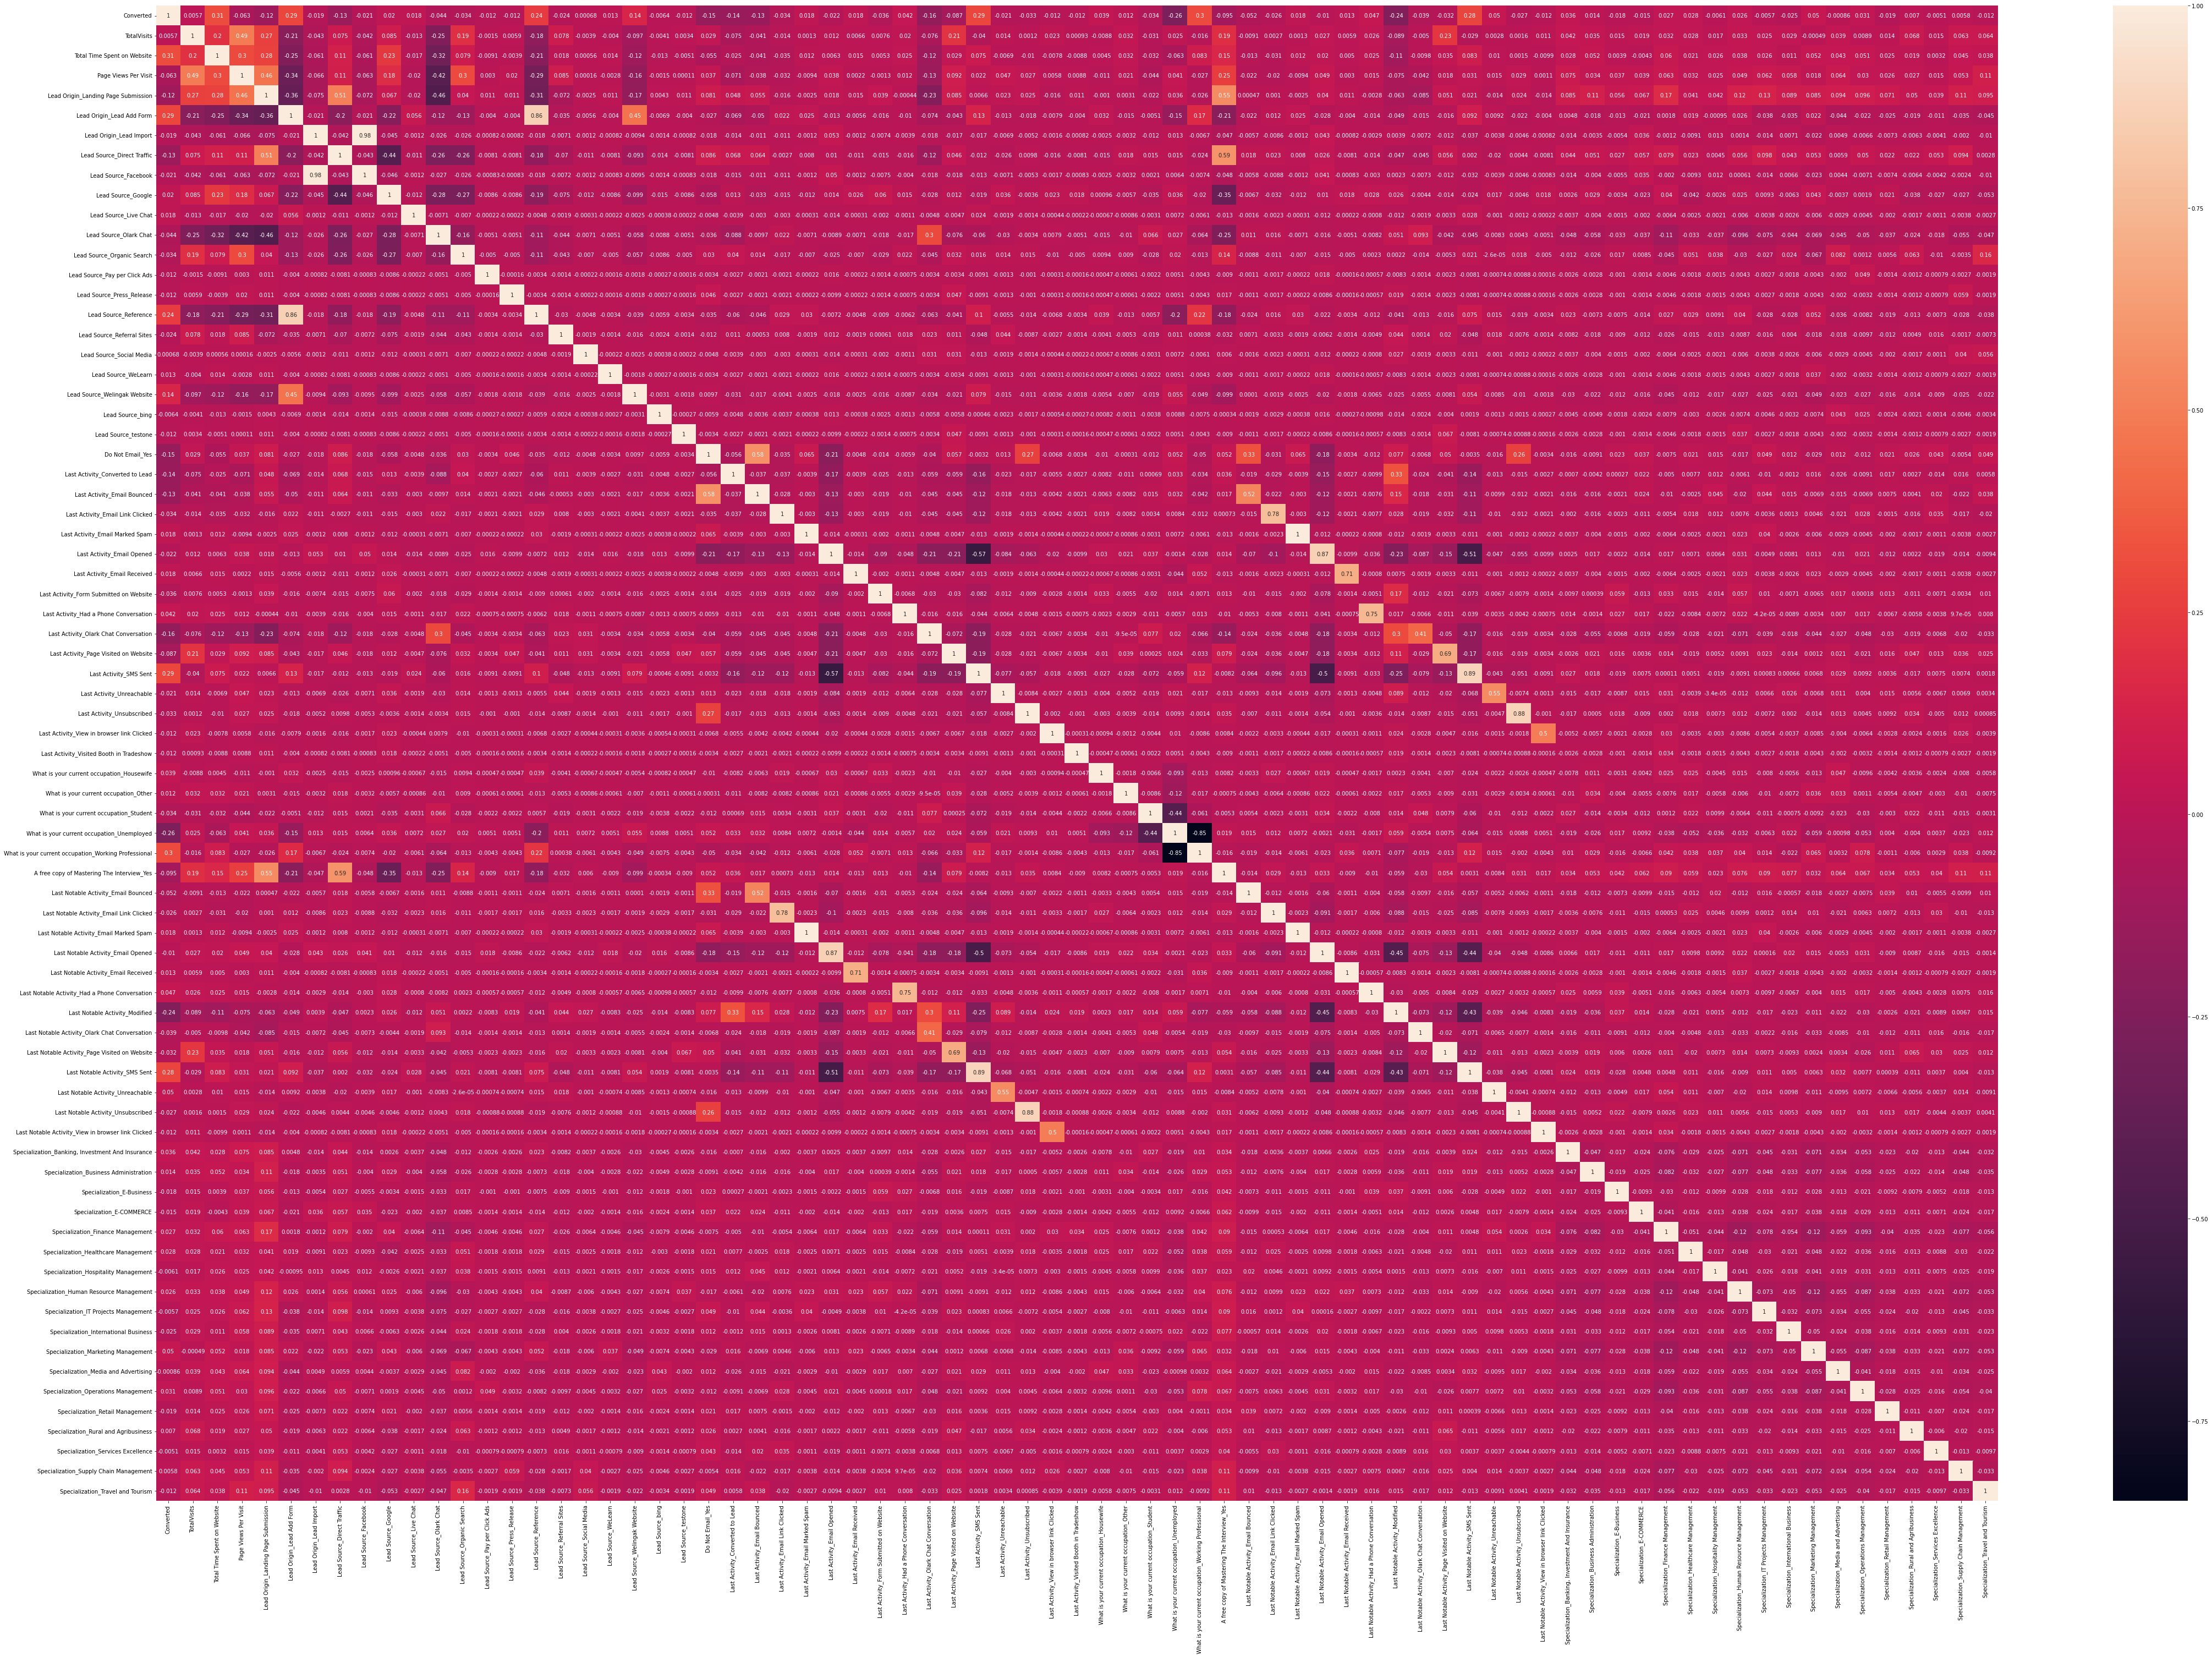

In [239]:
# Looking at the correlation table
plt.figure(figsize = (75,50))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

In [240]:
lead_data.corr()

Converted  TotalVisits  \
Converted                                            1.000000     0.005651   
TotalVisits                                          0.005651     1.000000   
Total Time Spent on Website                          0.313338     0.202551   
Page Views Per Visit                                -0.063362     0.489039   
Lead Origin_Landing Page Submission                 -0.117563     0.267954   
Lead Origin_Lead Add Form                            0.288666    -0.208375   
Lead Origin_Lead Import                             -0.019269    -0.043000   
Lead Source_Direct Traffic                          -0.133600     0.075252   
Lead Source_Facebook                                -0.021207    -0.042052   
Lead Source_Google                                   0.020205     0.085306   
Lead Source_Live Chat                                0.018407    -0.012720   
Lead Source_Olark Chat                              -0.044348    -0.247963   
Lead Source_Organic Search                          -0.034223     0.192469   
Lead Source_Pay per Click Ads                       -0.012059    -0.001549   
Lead Source_Press_Release                           -0.012059     0.005896   
Lead Source_Reference                                0.243200    -0.180458   
Lead Source_Referral Sites                          -0.023501     0.078163   
Lead Source_Social Media                             0.000676    -0.003946   
Lead Source_WeLearn                                  0.013015    -0.004031   
Lead Source_Welingak Website                         0.144864    -0.097011   
Lead Source_bing                                    -0.006411    -0.004116   
Lead Source_testone                                 -0.012059     0.003414   
Do Not Email_Yes                                    -0.148451     0.028900   
Last Activity_Converted to Lead                     -0.138834    -0.074517   
Last Activity_Email Bounced                         -0.134838    -0.040748   
Last Activity_Email Link Clicked                    -0.033557    -0.013791   
Last Activity_Email Marked Spam                      0.018407     0.001319   
Last Activity_Email Opened                          -0.022391     0.011982   
Last Activity_Email Received                         0.018407     0.006584   
Last Activity_Form Submitted on Website             -0.036322     0.007614   
Last Activity_Had a Phone Conversation               0.041575     0.020031   
Last Activity_Olark Chat Conversation               -0.164168    -0.076145   
Last Activity_Page Visited on Website               -0.087121     0.210159   
Last Activity_SMS Sent                               0.285854    -0.039886   
Last Activity_Unreachable                           -0.021383     0.013528   
Last Activity_Unsubscribed                          -0.032757     0.001193   
Last Activity_View in browser link Clicked          -0.011583     0.022964   
Last Activity_Visited Booth in Tradeshow            -0.012059     0.000933   
What is your current occupation_Housewife            0.039068    -0.008788   
What is your current occupation_Other                0.011575     0.032481   
What is your current occupation_Student             -0.034491    -0.030920   
What is your current occupation_Unemployed          -0.259722     0.024928   
What is your current occupation_Working Profess...   0.304859    -0.016292   
A free copy of Mastering The Interview_Yes          -0.094833     0.186583   
Last Notable Activity_Email Bounced                 -0.052371    -0.009105   
Last Notable Activity_Email Link Clicked            -0.026291     0.002706   
Last Notable Activity_Email Marked Spam              0.018407     0.001319   
Last Notable Activity_Email Opened                  -0.010199     0.026851   
Last Notable Activity_Email Received                 0.013015     0.005896   
Last Notable Activity_Had a Phone Conversation       0.046969     0.026100   
Last Notable Activity_Modified                      -0.239572    -0.088690

# Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [241]:
import statsmodels.api as sm

In [242]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Jan 2023   Deviance:                   1.1126e+05
Time:                        16:09:02   Pearson chi2:                 5.44e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.819e+15   8.84e+07  -4.32e+07      0.000   -3.82e+15   -3.82e+15
TotalVisits                                           4.311e+15    5.4e+07   7.99e+07      0.000    4.31e+15    4.31e+15
Total Time Spent on Website                           7.389e+14   4.67e+06   1.58e+08      0.000    7.39e+14    7.39e+14
Page Views Per Visit                                  5.726e+14   1.16e+07   4.96e+07      0.000    5.73e+14    5.73e+14
Lead Origin_Landing Page Submission                  -9.299e+14   3.81e+06  -2.44e+08      0.000    -9.3e+14    -9.3e+14
Lead Origin_Lead Add Form                             4.962e+15   4.77e+07   1.04e+08      0.000    4.96e+15    4.96e+15
Lead Origin_Lead Import                               5.148e+15   4.21e+07   1.22e+08      0.000    5.15e+15    5.15e+15
Lead Source_Direct Traffic                            9.025e+15   8.26e+07   1.09e+08      0.000    9.03e+15    9.03e+15
Lead Source_Facebook                                  5.148e+15   4.21e+07   1.22e+08      0.000    5.15e+15    5.15e+15
Lead Source_Google                                    9.046e+15   8.25e+07    1.1e+08      0.000    9.05e+15    9.05e+15
Lead Source_Live Chat                                 8.243e+15   8.24e+07      1e+08      0.000    8.24e+15    8.24e+15
Lead Source_Olark Chat                                9.133e+15   8.25e+07   1.11e+08      0.000    9.13e+15    9.13e+15
Lead Source_Organic Search                            9.023e+15   8.26e+07   1.09e+08      0.000    9.02e+15    9.02e+15
Lead Source_Pay per Click Ads                         1.006e+16   1.06e+08   9.45e+07      0.000    1.01e+16    1.01e+16
Lead Source_Press_Release                             6.127e+15   1.07e+08   5.73e+07      0.000    6.13e+15    6.13e+15
Lead Source_Reference                                 4.828e+15   6.74e+07   7.16e+07      0.000    4.83e+15    4.83e+15
Lead Source_Referral Sites                            8.725e+15   8.31e+07   1.05e+08      0.000    8.73e+15    8.73e+15
Lead Source_Social Media                               117.3081   1.23e-06   9.53e+07      0.000     117.308     117.308
Lead Source_WeLearn                                   1.472e+16   1.06e+08   1.38e+08      0.000    1.47e+16    1.47e+16
Lead Source_Welingak Website                          5.446e+15   6.77e+07   8.04e+07      0.000    5.45e+15    5.45e+15
Lead Source_bing                                      5.525e+15   9.52e+07    5.8e+07      0.000    5.53e+15    5.53e+15
Lead Source_testone                                     5.1e+15   1.06e+08   4.79e+07      0.000     5.1e+15     5.1e+15
Do Not Email_Yes                                     -8.36

In [243]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [244]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [245]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [246]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [247]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [248]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       '

In [249]:
# Import statsmodels

import statsmodels.api as sm

In [250]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 02 Jan 2023   Deviance:                       4145.5
Time:                        16:09:08   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are quite a few variables which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [251]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [253]:
col=col.drop("Lead Source_Reference")

In [254]:
X_train_sm3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 02 Jan 2023   Deviance:                       4146.5
Time:                        16:09:08   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [255]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

In [256]:
col=col.drop("Last Notable Activity_Had a Phone Conversation")
X_train_sm4 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 02 Jan 2023   Deviance:                       4152.2
Time:                        16:09:09   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [257]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
8           What is your current occupation_Housewife  1.01
12                  Last Notable Activity_Unreachable  1.01

In [258]:
col=col.drop("What is your current occupation_Housewife")
X_train_sm5 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 02 Jan 2023   Deviance:                       4156.7
Time:                        16:09:09   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [259]:
col=col.drop("What is your current occupation_Working Professional")
X_train_sm6 = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm6, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 02 Jan 2023   Deviance:                       4158.1
Time:                        16:09:09   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [260]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

#Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [261]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [262]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

### Creating a dataframe with the actual conversion flag and the predicted probabilites

In [263]:
y_train_pred_final = pd.DataFrame(
    {'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300117
1          0         0.142002
2          1         0.127629
3          1         0.291558
4          1         0.954795

In [264]:
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.300117          0
1          0         0.142002          0
2          1         0.127629          0
3          1         0.291558          0
4          1         0.954795          1

Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [265]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [266]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]])

In [267]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [268]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [269]:
# Calculate the sensitivity

TP/(TP+FN)

0.739413680781759

In [270]:
# Calculate the specificity

TN/(TN+FP)

0.8343425605536332

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [271]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [272]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

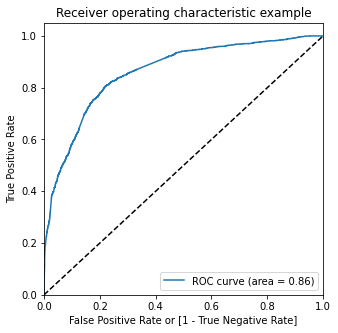

In [273]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [274]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [275]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


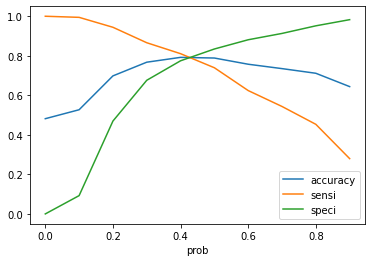

In [276]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [277]:
# The intersection happens at roughly 0.42. Hence, we will use this value to build the model.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [278]:

# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [279]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[1823,  489],
       [ 444, 1705]])

In [280]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [281]:
# Calculate Sensitivity

TP/(TP+FN)

0.793392275476966

In [282]:
# Calculate Specificity

TN/(TN+FP)

0.7884948096885813

The cutoff point is good.

# Step 4: Making Predictions on the Test Set.

Let's now make predicitons on the test set.

In [283]:
# Scale the test set as well using just 'transform'. Note this was already done earlier,hence commented out.
#X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [284]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                       0                             0                 0   
6122                       0                             0                 0   
9202                       0                             0                 0   
6570                       0                             0                 1   
2668                       0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [285]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [286]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
4233    1.0     0.000000                     0.000000   
3368    1.0     0.007968                     0.705106   
9091    1.0     0.035857                     0.406690   
5972    1.0     0.007968                     0.030810   
3631    1.0     0.019920                     0.505722   
6884    1.0     0.000000                     0.000000   
4362    1.0     0.007968                     0.102113   
7718    1.0     0.023904                     0.140845   
3715    1.0     0.015936                     0.464349   
4198    1.0     0.011952                     0.367518   
7790    1.0     0.003984                     0.183979   
2424    1.0     0.015936                     0.345951   
1899    1.0     0.023904                     0.805458   
8209    1.0     0.007968                     0.066461   
182     1.0     0.015936                     0.397887   
2010    1.0     0.027888                     0.381162   
731     1.0     0.007968                     0.149648   
1872    1.0     0.000000                     0.000000   
8987    1.0     0.011952                     0.574824   
3083    1.0     0.011952                     0.292254   
8205    1.0     0.000000                     0.000000   
5370    1.0     0.007968                     0.075264   
7386    1.0     0.000000                     0.000000   
1925    1.0     0.019920                     0.381162   
1965    1.0     0.000000                     0.000000   
1552    1.0     0.007968                     0.628961   
8442    1.0     0.000000                     0.000000   
7766    1.0     0.019920                     0.025968   
2798    1.0     0.000000                     0.000000   
999     1.0     0.023904                     0.812940   
8114    1.0     0.019920                     0.615757   
3193    1.0     0.039841                     0.095070   
2914    1.0     0.007968                     0.492518   
8174    1.0     0.000000                     0.000000   
1991    1.0     0.039841                     0.655370   
8497    1.0     0.007968                     0.092430   
6989    1.0     0.035857                     0.410211   
6175    1.0     0.015936                     0.828345   
5710    1.0     0.011952                     0.062500   
9162    1.0     0.027888                     0.667254   
5652    1.0     0.000000                     0.000000   
6948    1.0     0.003984                     0.031250   
1311    1.0     0.007968                     0.512764   
5998    1.0     0.043825                     0.314261   
2050    1.0     0.035857                     0.168134   
6144    1.0     0.015936                     0.401849   
9142    1.0     0.011952                     0.101673   
8567    1.0     0.000000                     0.000000   
7048    1.0     0.035857                     0.542694   
6459    1.0     0.011952                     0.106954   
288     1.0     0.015936                     0.013644   
8864    1.0     0.011952                     0.122359   
3814    1.0     0.011952                     0.595511   
8641    1.0     0.000000                     0.000000   
5814    1.0     0.007968                     0.096391   
4551    1.0     0.019920                     0.536972   
1886    1.0     0.011952                     0.466989   
1644    1.0     0.000000                     0.000000   
2131    1.0     0.000000                     0.000000   
6942    1.0     0.000000                     0.000000   
6655    1.0     0.019920                     0.073063   
6545    1.0     0.043825                     0.001320   
1602    1.0     0.015936                     0.001761   
3579    1.0     0.015936                     0.061620   
889     1.0     

In [287]:
X_test_sm.shape

(1912, 12)

In [288]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test[col]))

In [289]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [290]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [291]:
# Let's see the head

y_pred_1.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [292]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [293]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [294]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [295]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [296]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [297]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [298]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [299]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [300]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [301]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[786, 210],
       [202, 714]])

In [302]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [303]:
# Calculate sensitivity
TP / float(TP+FN)

0.793392275476966

In [304]:
# Calculate specificity
TN / float(TN+FP)

0.7884948096885813

# Precision-Recall View

Let's now also build the training model using the precision-recall view

In [305]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]])

In [306]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

In [307]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

# Precision and recall tradeoff

In [308]:
from sklearn.metrics import precision_recall_curve

In [309]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

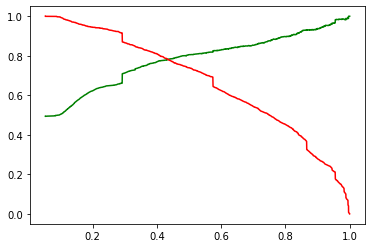

In [310]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [311]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [312]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [313]:
# Let's create the confusion matrix once again

confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion4

array([[1852,  460],
       [ 479, 1670]])

In [314]:
# Let's evaluate the other metrics as well

TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [315]:
# Calculate Precision

TP/(TP+FP)

0.784037558685446

In [316]:
# Calculate Recall

TP/(TP+FN)

0.7771056305258259

This cutoff point seems good to go!

# Step 4: Making Predictions on the Test Set

In [317]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test[col]))

In [318]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [319]:
# Converting y_pred to a dataframe

y_pred_2 = pd.DataFrame(y_test_pred)

In [320]:
# Let's see the head

y_pred_2.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [321]:
# Converting y_test to dataframe

y_test_df1 = pd.DataFrame(y_test)

In [322]:
# Remove index for both dataframes to append them side by side 

y_pred_2.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [323]:
# Append y_test_df1 and y_pred_2
y_pred_final1 = pd.concat([y_test_df, y_pred_1],axis=1)

In [324]:
# Check 'y_pred_final'

y_pred_final1.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [325]:
# Rename the column 

y_pred_final1= y_pred_final1.rename(columns = {0 : 'Conversion_Prob'})

In [326]:
# Let's see the head of y_pred_final

y_pred_final1.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [327]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final1['final_predicted'] = y_pred_final1.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [328]:
# Check y_pred_final

y_pred_final1.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [329]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final1['Converted'], y_pred_final1.final_predicted)

0.7866108786610879

In [330]:
confusion5 = metrics.confusion_matrix(y_pred_final1['Converted'], y_pred_final1.final_predicted )
confusion5

array([[801, 195],
       [213, 703]])

In [331]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [332]:
# Calculate Precision

TP/(TP+FP)

0.7828507795100222

In [333]:
# Calculate Recall

TP/(TP+FN)

0.767467248908297

In [334]:
# Let us calculate specificity
TN / float(TN+FP)

0.8042168674698795

Precision and Recall are quite close, hence we will stick with this model. 

# Final Model Stats

#### Inference:

After running the model on the Test Data these are the figures we obtain:

*   Sensitivity : 76.75%
*   Specificity : 80.42%
*   Accuracy : 78.66%

#### Conclusion:
* While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
* Accuracy, Sensitivity and Specificity values of test set are around 79%, 77% and 80% respectively which are approximately closer to the respective values calculated using trained set.
* Hence this model is good. 

#### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

* Lead Origin_Lead Add Form
* What is your current occupation_Working Professional
* Total Time Spent on Website